In [1]:
from sympy import *
init_printing()

In [2]:
R = Symbol("R", positive=True, real=True)
a, b, i, v = symbols("a b i v", real=True)

In [3]:
port_eq = [
    Eq(a, v + R*i),
    Eq(b, v - R*i),
]
port_eq

# Diode clipper

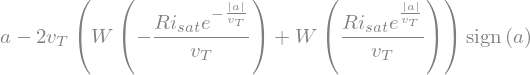

In [4]:
isat, vt = symbols("i_sat v_T", real=True, positive=True)
port_diode_expr = a - 2 * sign(a) * vt * (LambertW(R*isat / vt * exp(abs(a) / vt)) + LambertW(-R*isat / vt * exp(-abs(a) / vt)))
port_diode_expr

c:\Users\solarliner\source\repos\SolarLiner\valib\.venv\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


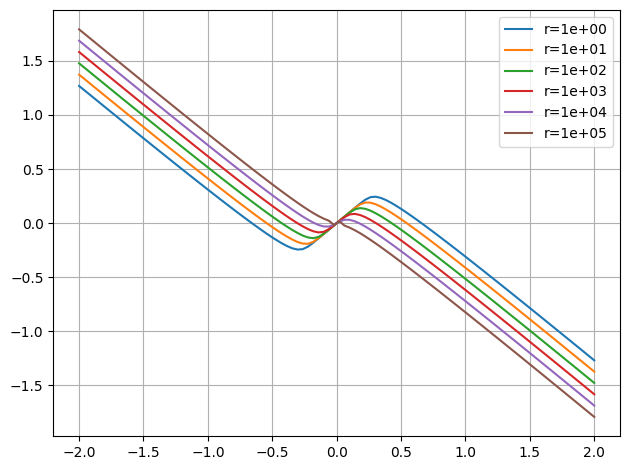

In [5]:
from matplotlib import pyplot as plt
import numpy as np

for r in np.logspace(0, 5, 6):
    eq = port_diode_expr.subs({isat: 200e-9, vt: 23e-3, R: r})
    reflected = lambdify([a], eq)
    sx = np.linspace(-2, 2, 100)
    y = reflected(sx)
    plt.plot(sx, y, label=f"r={r:4.0}")

plt.tight_layout()
plt.legend()
plt.grid(True, which="both")

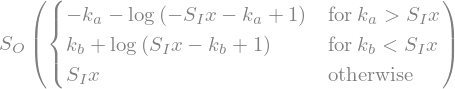

In [16]:
ka, kb, si, so = symbols('k_a k_b S_I S_O', real=True, positive=True)
sx = si*Symbol('x', real=True)
sat_sym = lambda x: so * Piecewise(
    (-log(1-x-ka) - ka, x < ka),
    (log(1+x-kb) + kb, x > kb),
    (x, True)
)
sat_sym(sx)

In [42]:
def sat(x, a, b, si, so):
    sx = si*x
    lower = -np.log(1-sx-a) - a
    higher = np.log(1+sx-b) + b
    sat = np.where(sx > -a, np.where(sx > b, higher, sx), lower)
    return so*sat - x

[10.04633186 10.04633186 38.02748316  0.05128025]


C:\Users\solarliner\AppData\Local\Temp\ipykernel_6236\1847495194.py:3: RuntimeWarning: invalid value encountered in log
  lower = -np.log(1-sx-a) - a
C:\Users\solarliner\AppData\Local\Temp\ipykernel_6236\1847495194.py:4: RuntimeWarning: invalid value encountered in log
  higher = np.log(1+sx-b) + b


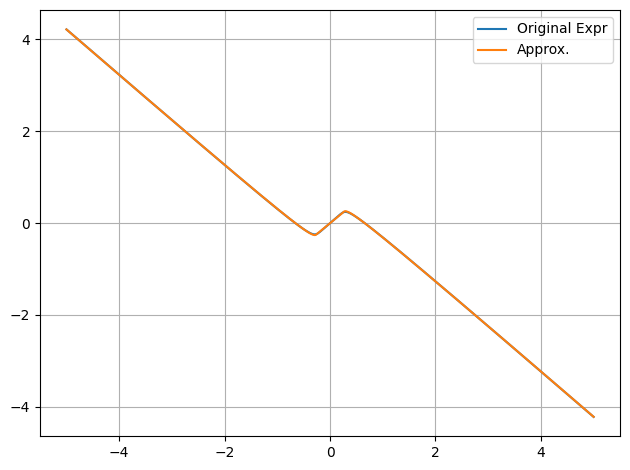

In [64]:
from scipy.optimize import curve_fit


sx = np.linspace(-5, 5, 500)
y = lambdify([a], port_diode_expr.subs({isat: 200e-9, vt: 23e-3, R: 1}))

v, _ = curve_fit(sat, sx, y(sx))
print(v)
yr = lambda x: sat(x, *v)

plt.plot(sx, y(sx), label="Original Expr")
plt.plot(sx, yr(sx), label="Approx.")
plt.tight_layout()
plt.legend()
plt.grid(True, which="both")